In [ ]:
UNAD

Jhordin Andres Olave Zuñiga

Prediccion enfermedad cardiaca con Regresion Lineal

In [80]:
#cargar variables necesarias

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import hvplot.pandas
import random

#librerias para modelo de ciencia de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
#lectura de datos en Python y carga en variable

Datos = pd.read_csv('./car details v3.csv')

In [102]:
Datos.head(150)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volvo XC40 D4 R-Design,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
146,Audi Q7 35 TDI Quattro Premium,2015,2650000,53000,Diesel,Dealer,Automatic,First Owner,12.07 kmpl,2967 CC,241.4 bhp,550Nm@ 1750-2750rpm,7.0
147,Maruti Ciaz ZDi,2015,535000,40000,Diesel,Dealer,Manual,First Owner,26.21 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
148,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,282 bhp,490Nm@ 1600rpm,5.0


In [103]:
# Descripción de los datos
Datos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [104]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Text(0.5, 1.0, 'Identificación de datos atípicos en la columna seats')

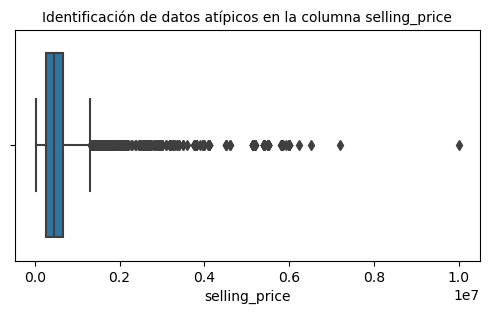

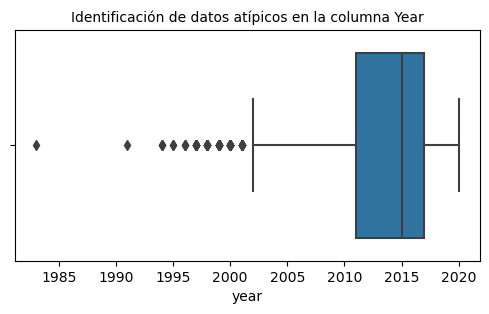

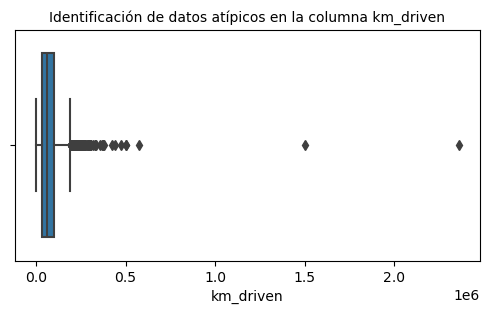

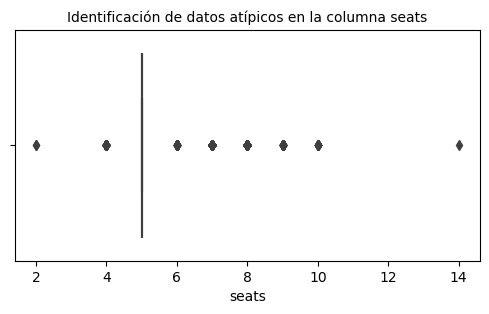

In [106]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['selling_price'])
plt.title('Identificación de datos atípicos en la columna selling_price', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['year'])
plt.title('Identificación de datos atípicos en la columna Year', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['km_driven'])
plt.title('Identificación de datos atípicos en la columna km_driven', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['seats'])
plt.title('Identificación de datos atípicos en la columna seats', fontsize=10 )

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

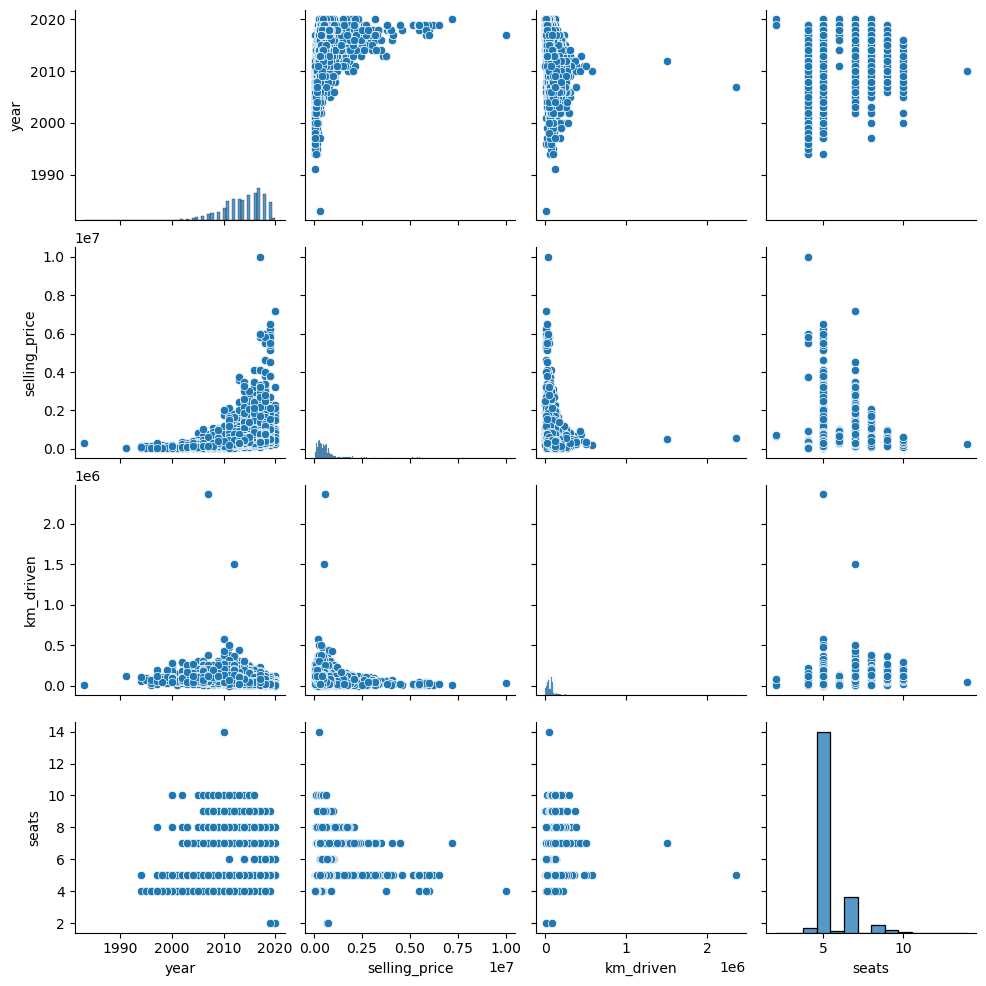

In [107]:
sns.pairplot(Datos)
plt.show()

In [108]:
#Revisión de datos faltantes

print("Cantidad de Registros nulos en Nivel de selling_price: ",Datos['selling_price'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de year: ",Datos['year'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de km_driven: ",Datos['km_driven'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de seats: ",Datos['seats'].isin([0]).sum())

Cantidad de Registros nulos en Nivel de selling_price:  0
Cantidad de Registros nulos en Nivel de year:  0
Cantidad de Registros nulos en Nivel de km_driven:  0
Cantidad de Registros nulos en Nivel de seats:  0


In [109]:
#conteo de datos atipicos

year_min=1999
year_max=2023
year_atipic=((Datos['year']<year_min)|(Datos['year']>year_max)).sum()
print("El total de datos atípicos en la columna year es de {}".format(year_atipic))

price_min=75000
price_max=9000000
price_atipic=((Datos['selling_price']<price_min)|(Datos['selling_price']>price_max)).sum()
print("El total de datos atípicos en la columna selling_price es de {}".format(price_atipic))

Min_Km=15000
Max_Km=750000
Km_atipic=((Datos['km_driven']<Min_Km)|(Datos['km_driven']>Max_Km)).sum()
print("El total de datos atípicos en la columna km_driven es de {}".format(Km_atipic))

Min_Seating_Capacity=4
Max_Seating_Capacity=7
Seating_Capacity_atipic=((Datos['seats']<Min_Seating_Capacity)|(Datos['seats']>Max_Seating_Capacity)).sum()
print("El total de datos atípicos en la columna seats es de {}".format(Seating_Capacity_atipic))

El total de datos atípicos en la columna year es de 31
El total de datos atípicos en la columna selling_price es de 184
El total de datos atípicos en la columna km_driven es de 689
El total de datos atípicos en la columna seats es de 338


In [110]:
# Filtra Datos Atípicos
Datos=Datos[(Datos['year']<year_max)&(Datos['year']>year_min)]
Datos=Datos[(Datos['selling_price']<price_max)&(Datos['selling_price']>price_min)]
Datos=Datos[(Datos['km_driven']<Max_Km)&(Datos['km_driven']>Min_Km)]
Datos=Datos[(Datos['seats']<Max_Seating_Capacity)&(Datos['seats']>Min_Seating_Capacity)]

In [111]:
# Validar si se corrigieron los datos atípicos

year_atipic=((Datos['year']<year_min)|(Datos['year']>year_max)).sum()
print("El total de datos atípicos en la columna year es de {}".format(year_atipic))

price_atipic=((Datos['selling_price']<price_min)|(Datos['selling_price']>price_max)).sum()
print("El total de datos atípicos en la columna selling_price es de {}".format(price_atipic))

Km_atipic=((Datos['km_driven']<Min_Km)|(Datos['km_driven']>Max_Km)).sum()
print("El total de datos atípicos en la columna km_driven es de {}".format(Km_atipic))

Seating_Capacity_atipic=((Datos['seats']<Min_Seating_Capacity)|(Datos['seats']>Max_Seating_Capacity)).sum()
print("El total de datos atípicos en la columna seats es de {}".format(Seating_Capacity_atipic))

El total de datos atípicos en la columna year es de 0
El total de datos atípicos en la columna selling_price es de 0
El total de datos atípicos en la columna km_driven es de 0
El total de datos atípicos en la columna seats es de 0


In [112]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5471 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5471 non-null   object 
 1   year           5471 non-null   int64  
 2   selling_price  5471 non-null   int64  
 3   km_driven      5471 non-null   int64  
 4   fuel           5471 non-null   object 
 5   seller_type    5471 non-null   object 
 6   transmission   5471 non-null   object 
 7   owner          5471 non-null   object 
 8   mileage        5471 non-null   object 
 9   engine         5471 non-null   object 
 10  max_power      5471 non-null   object 
 11  torque         5471 non-null   object 
 12  seats          5471 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 598.4+ KB


In [113]:
# Total de precios de venta
Datos['selling_price'].value_counts()

selling_price
300000     175
350000     165
250000     142
450000     141
400000     139
          ... 
698000       1
539000       1
92000        1
1825000      1
746000       1
Name: count, Length: 490, dtype: int64

In [114]:
Datos[['selling_price']].head(50)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
8,350000
9,200000
10,500000


In [115]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
typestring = ['name','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque']
X = Datos.drop(typestring,axis=1)
Y = Datos['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [116]:
print (X_train)

      year  selling_price  km_driven  seats
2141  2016         329000      19000    5.0
7750  2014         325000      65204    5.0
757   2011         180000      80000    5.0
1523  2012         290000     100000    5.0
6446  2010         200000     188000    5.0
...    ...            ...        ...    ...
7341  2018         910000      20000    5.0
4915  2012         325000      80000    5.0
2497  2016         400000      60000    5.0
3903  2012         415000      82082    5.0
4079  2016         500000      35000    5.0

[4103 rows x 4 columns]


In [117]:
print (y_train)

2141    329000
7750    325000
757     180000
1523    290000
6446    200000
         ...  
7341    910000
4915    325000
2497    400000
3903    415000
4079    500000
Name: selling_price, Length: 4103, dtype: int64


In [118]:
# Construir el modelo de regresión Lineal 
modelineal = LinearRegression()
modelineal.fit(X_train, y_train)
Prediclineal= modelineal.predict(X_test)

In [119]:
print (y_test)

5388     340000
2107     590000
1781     169000
6383     620000
2787     325000
         ...   
5144     110000
3705     810000
4675    1650000
5535     245000
3346     270000
Name: selling_price, Length: 1368, dtype: int64


In [120]:
print (Prediclineal)

[ 340000.  590000.  169000. ... 1650000.  245000.  270000.]


In [121]:
# Desempeño del modelo de regresión
MAE= metrics.mean_absolute_error(y_test, Prediclineal)
MSE=metrics.mean_squared_error(y_test, Prediclineal)
RMSE= np.sqrt(MSE)

In [122]:
MAE

7.202559796145611e-11

In [123]:
MSE

8.666143923982457e-21

In [124]:
RMSE

9.309212600420326e-11

In [125]:
Datos['selling_price'].mean()

551648.8067994883

In [126]:
test_residual= y_test - Prediclineal

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


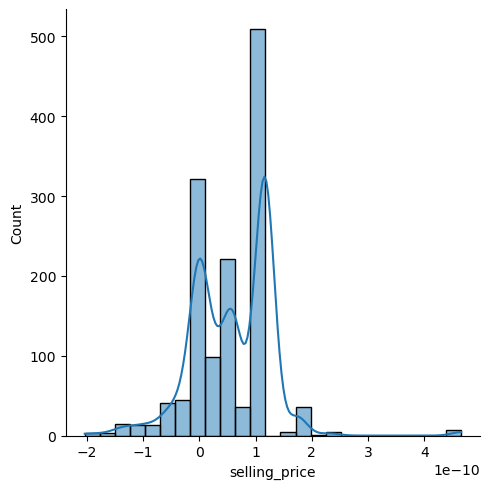

In [127]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()
sns.displot(test_residual, bins=25, kde=True)

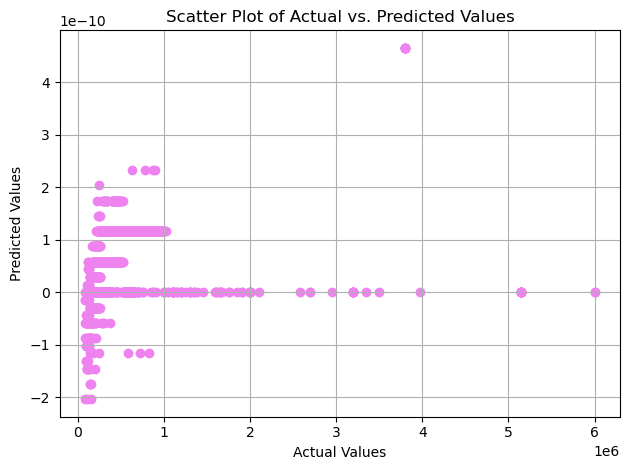

In [128]:
plt.scatter(y_test,test_residual, color='violet') 
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()